#Import Libraries

In [58]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM

#Analyze Data

In [59]:
quote = '^GSPC'
df = web.DataReader(quote, data_source='yahoo', start='2010-01-01', end='2021-06-14')
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-08,4236.740234,4208.410156,4233.810059,4227.259766,3943870000,4227.259766
2021-06-09,4237.089844,4218.740234,4232.990234,4219.549805,3902870000,4219.549805
2021-06-10,4249.740234,4220.339844,4228.560059,4239.180176,3502480000,4239.180176
2021-06-11,4248.379883,4232.250000,4242.899902,4247.439941,3204280000,4247.439941
2021-06-14,4255.589844,4234.069824,4248.310059,4255.149902,3612050000,4255.149902


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2010-01-04 to 2021-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2881 non-null   float64
 1   Low        2881 non-null   float64
 2   Open       2881 non-null   float64
 3   Close      2881 non-null   float64
 4   Volume     2881 non-null   int64  
 5   Adj Close  2881 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 157.6 KB


In [61]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03,2881.000000
mean,2162.669257,2139.784617,2151.666847,2152.176056,3.857802e+09,2152.176056
std,763.070129,756.059408,759.655076,759.762472,9.615106e+08,759.762472
min,1032.949951,1010.909973,1027.650024,1022.580017,1.025000e+09,1022.580017
25%,1438.430054,1426.189941,1430.469971,1432.119995,3.288870e+09,1432.119995
50%,2077.850098,2057.939941,2068.550049,2068.590088,3.675390e+09,2068.590088
75%,2739.189941,2709.540039,2723.600098,2724.439941,4.227890e+09,2724.439941
max,4255.589844,4234.069824,4248.310059,4255.149902,1.061781e+10,4255.149902


Get the Dimension of the Dataset

In [62]:
df.shape

(2881, 6)

Visualise the Closing Price History


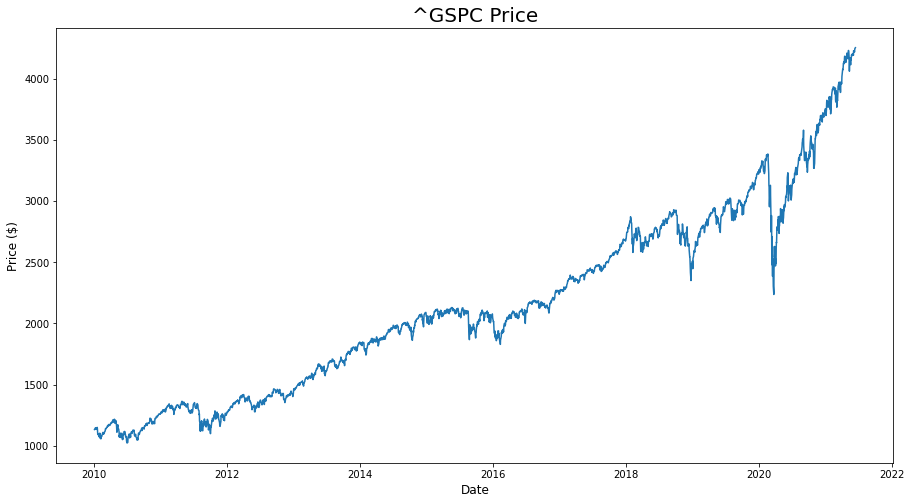

In [63]:
plt.figure(figsize=(15,8))
plt.title(quote + ' Price', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.plot(df['Close'])

Visualise Trading Volume

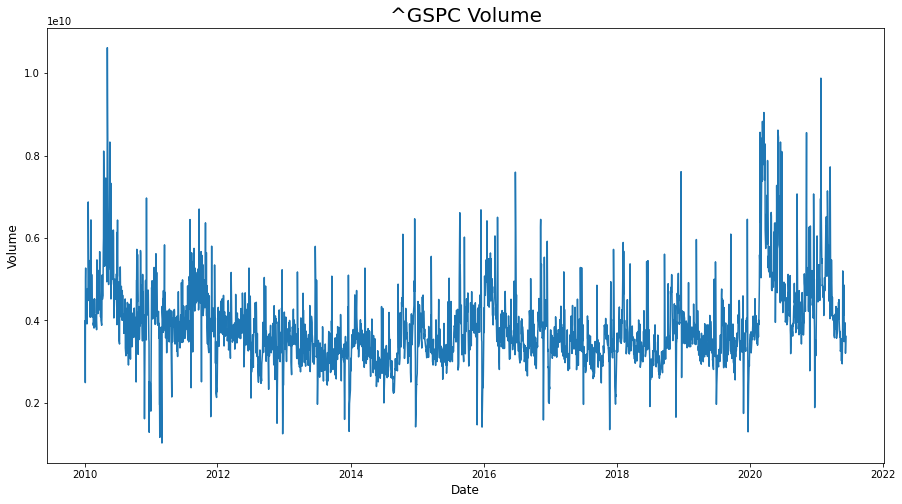

In [64]:
plt.figure(figsize=(15,8))
plt.title(quote + ' Volume', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.plot(df['Volume'])

# Data Preprocessing




Normalize Data with MinMaxScaler to set Price Values Between 0 and 1

In [65]:
normalized_data = df.copy()
normalized_data = normalized_data.drop(['Close', 'Volume'], axis=1)
normalized_data.rename(columns={'Adj Close': 'Close'}, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data['Open'] = scaler.fit_transform(normalized_data['Open'].values.reshape(-1, 1))
normalized_data['High'] = scaler.fit_transform(normalized_data['High'].values.reshape(-1, 1))
normalized_data['Low'] = scaler.fit_transform(normalized_data['Low'].values.reshape(-1, 1))
normalized_data['Close'] = scaler.fit_transform(normalized_data['Close'].values.reshape(-1, 1))

normalized_data.tail(5)

,High,Low,Open,Close
Date,,,,
2021-06-08,0.994151,0.992039,0.995498,0.991372
2021-06-09,0.994259,0.995244,0.995243,0.988987
2021-06-10,0.998185,0.995740,0.993868,0.995060
2021-06-11,0.997763,0.999435,0.998320,0.997615
2021-06-14,1.000000,1.000000,1.000000,1.000000


Split the Data Into: 80% Train, 10 Validation and 10% Test

In [66]:
train_data_percentage = 80
test_data_percentage = 20
  
test_data_len = int(np.round(test_data_percentage/100*normalized_data.shape[0]))
train_data_len = int(normalized_data.shape[0] - test_data_len)

print('Test', 'Train')
print(test_data_len, train_data_len)


Test Train
576 2305


Split Training, Validation and Testing Data

In [85]:
X_train = normalized_data[:train_data_len]
X_test = normalized_data[train_data_len:]

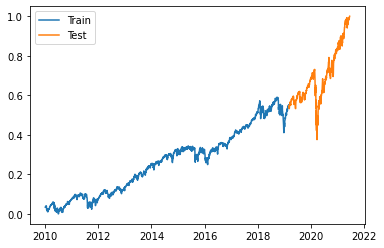

In [68]:
plt.plot(X_train['Close'])
plt.plot(X_test['Close'])
plt.legend(['Train', 'Test'])

# Building the LSTM Model Using Sequential API

In [69]:
model = Sequential()
model.add(LSTM(50, return_sequences=True))